In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
url='/content/NFHS.xlsx - NFHS.csv'
data=pd.read_csv(url)
data.head()

,Sl.No,Category,Indicators (2019-20),Urban,Rural,Total (2019-20),Total (2015-16),Adilabad,Bhadradri,Hyderabad,Jagitial,Jangoan,Jayashankar Bhupalapally,Jogulamba Gadwal,Kamareddy,Karimnagar,Khammam,KumurumBheem,Mahabubabad,Mahabubnagar,Mancherial,Medak,Medchal-Malkajgiri,Nagarkurnool,Nalgonda,Nirmal,Nizamabad,Peddapalli,Rajanna Sircilla,Ranga Reddy,Sangareddy,Siddipet,Suryapet,Vikarabad,"Wanaparthy,",Warangal Rural,Warangal Urban,Yadadri
0,1.0,Population and Household Profile,1. Female population age 6 years and above who...,`,52.4,60.9,62.6,58.6,62.7,80.3,55.9,56.6,52.4,47.8,51.1,63.6,61.8,52.9,55.0,54.8,58.4,52.3,72.9,51.1,59.8,53.3,54.3,61.3,56.4,68.6,60.2,60.8,57.4,53.1,49.3,51.8,70.3,59.1
1,2.0,Population and Household Profile,2. Population below age 15 years (%),23.4,22.0,22.5,25.1,24.8,19.5,23.0,24.1,19.1,18.5,26.8,23.4,20.1,19.0,23.7,21.8,27.8,19.5,23.4,23.1,23.8,23.9,22.7,23.7,18.1,21.3,24.1,24.5,22.0,18.9,24.9,24.8,17.3,20.2,23.0
2,3.0,Population and Household Profile,3. Sex ratio of the total population (females ...,1015.0,1070.0,1049.0,1007.0,992.0,1082.0,959.0,1219.0,1066.0,1079.0,1037.0,1104.0,1065.0,1061.0,1024.0,1067.0,1035.0,1065.0,1051.0,996.0,1066.0,1017.0,1171.0,1132.0,1028.0,1167.0,1022.0,1053.0,1062.0,1032.0,998.0,1018.0,1070.0,1087.0,1071.0
3,4.0,Population and Household Profile,4. Sex ratio at birth for children born in the...,873.0,907.0,894.0,872.0,785.0,817.0,844.0,955.0,1089.0,903.0,853.0,870.0,933.0,905.0,917.0,885.0,789.0,909.0,848.0,828.0,771.0,883.0,1138.0,941.0,913.0,1115.0,964.0,1039.0,976.0,980.0,775.0,987.0,698.0,829.0,954.0
4,5.0,Population and Household Profile,5. Children under age 5 years whose birth was ...,92.9,88.0,90.0,83.1,83.9,90.0,94.3,92.5,86.6,90.9,81.7,91.0,88.7,94.4,83.1,91.0,91.9,93.2,85.3,95.0,91.4,80.4,94.0,90.4,87.9,91.2,93.4,79.7,90.0,92.7,91.6,90.5,82.6,82.4,93.8


In [57]:
data.isnull().sum()

Sl.No                        9
Category                     9
Indicators (2019-20)         7
Urban                       12
Rural                       12
Total (2019-20)             12
Total (2015-16)             12
Adilabad                     6
Bhadradri                    6
Hyderabad                    6
Jagitial                     6
Jangoan                      6
Jayashankar Bhupalapally     6
Jogulamba Gadwal             6
Kamareddy                    6
Karimnagar                   6
Khammam                      6
KumurumBheem                 6
Mahabubabad                  6
Mahabubnagar                 6
Mancherial                   6
Medak                        6
Medchal-Malkajgiri           6
Nagarkurnool                 6
Nalgonda                     6
Nirmal                       6
Nizamabad                    6
Peddapalli                   6
Rajanna Sircilla             6
Ranga Reddy                  6
Sangareddy                   6
Siddipet                     6
Suryapet

In [7]:
#total categories
print("No. of unique categories : ", len(data["Category"].unique()))
print("Unique Categories : ", data["Category"].unique())

No. of unique categories :  20
Unique Categories :  ['Population and Household Profile'
 'Characteristics of Women (age 15-49 years)' 'Marriage and Fertility'
 'Current Use of Family Planning Methods (currently married women age 15–49 years)'
 'Unmet Need for Family Planning (currently married women age 15–49 years)'
 'Quality of Family Planning Services'
 'Maternal and Child Health Maternity Care (for last birth in the 5 years before the survey)'
 'Delivery Care (for births in the 5 years before the survey)'
 'Child Vaccinations and Vitamin A Supplementation'
 'Treatment of Childhood Diseases (children under age 5 years)'
 'Child Feeding Practices and Nutritional Status of Children'
 'Nutritional Status of Women (age 15-49 years)'
 'Anaemia among Children and Women'
 'Blood Sugar Level among Adults (age 15 years and above) Women'
 'Blood Sugar Level among Adults (age 15 years and above) Men'
 'Hypertension among Adults (age 15 years and above) Women'
 'Hypertension among Adults (age 1

In [8]:
#Total Districts
districts=data.columns[7:]
districts

Index(['Adilabad', 'Bhadradri', 'Hyderabad', 'Jagitial', 'Jangoan',
       'Jayashankar Bhupalapally', 'Jogulamba Gadwal', 'Kamareddy',
       'Karimnagar', 'Khammam', 'KumurumBheem', 'Mahabubabad', 'Mahabubnagar',
       'Mancherial', 'Medak', 'Medchal-Malkajgiri', 'Nagarkurnool', 'Nalgonda',
       'Nirmal', 'Nizamabad', 'Peddapalli', 'Rajanna Sircilla', 'Ranga Reddy',
       'Sangareddy', 'Siddipet', 'Suryapet', 'Vikarabad', 'Wanaparthy,',
       'Warangal Rural', 'Warangal Urban', 'Yadadri'],
      dtype='object')

# **Marriage and Fertility Data**

In [9]:
mar_fert_dt=data[data["Category"]=="Marriage and Fertility"]
mar_fert_dt.head()

,Sl.No,Category,Indicators (2019-20),Urban,Rural,Total (2019-20),Total (2015-16),Adilabad,Bhadradri,Hyderabad,Jagitial,Jangoan,Jayashankar Bhupalapally,Jogulamba Gadwal,Kamareddy,Karimnagar,Khammam,KumurumBheem,Mahabubabad,Mahabubnagar,Mancherial,Medak,Medchal-Malkajgiri,Nagarkurnool,Nalgonda,Nirmal,Nizamabad,Peddapalli,Rajanna Sircilla,Ranga Reddy,Sangareddy,Siddipet,Suryapet,Vikarabad,"Wanaparthy,",Warangal Rural,Warangal Urban,Yadadri
15,16.0,Marriage and Fertility,16. Women age 20-24 years married before age 1...,16.7,27.4,23.5,26.2,21.4,20.8,10.6,28.4,20.3,24.9,34.6,30.8,11.9,35.0,25.0,28.3,23.4,14.0,31.8,10.2,32.1,28.2,23.3,23.7,13.6,13.2,29.0,30.6,19.0,29.5,39.8,32.6,22.9,22.7,21.6
16,17.0,Marriage and Fertility,17. Births in the 5 years preceding the survey...,NaN,NaN,NaN,NaN,1.3,1.0,4.0,1.8,1.3,2.0,2.2,2.3,1.1,1.4,1.3,0.5,2.0,0.9,0.9,1.1,1.9,1.0,1.8,2.1,0.7,1.9,1.1,1.2,0.0,1.2,2.0,4.6,1.8,1.3,3.0
17,18.0,Marriage and Fertility,18. Women age 15-19 years who were already mot...,3.1,7.4,5.8,10.6,7.8,13.0,2.2,3.1,6.5,13.2,15.9,1.1,7.6,10.9,4.6,6.6,9.2,3.7,6.5,3.1,5.3,6.0,9.6,3.8,4.6,3.0,5.2,4.4,1.0,6.2,10.0,4.7,12.9,4.3,1.7
18,19.0,Marriage and Fertility,19. Women age 15-24 years who use hygienic met...,NaN,NaN,NaN,NaN,77.9,92.9,94.2,90.2,93.6,90.8,77.3,88.3,94.1,95.4,79.6,92.8,95.6,88.1,89.3,97.1,96.6,96.9,78.7,88.8,93.2,92.2,95.3,92.2,88.4,95.5,93.3,95.5,93.5,96.4,94.8


In [50]:
indic=mar_fert_dt["Indicators (2019-20)"]
indicators=[]

for i in indic:
  indicators.append(i[3:-4])

int_urban=[]
int_rural=[]

for i in mar_fert_dt["Urban"]:
  int_urban.append(float(i))

for j in mar_fert_dt["Rural"]:
  int_rural.append(float(j))

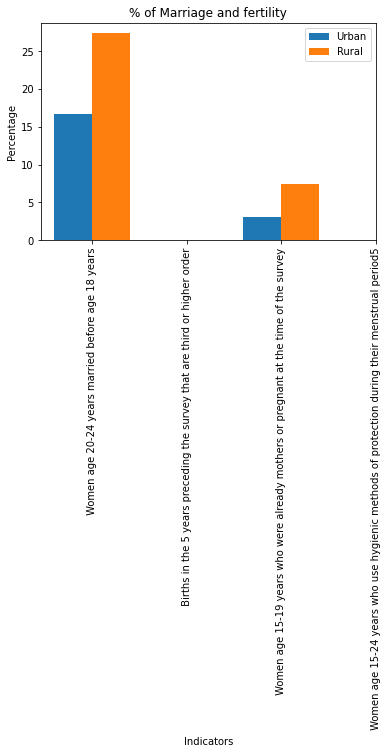

In [53]:
x_axis = np.arange(len(indicators))
plt.bar(x_axis - 0.2,int_urban, 0.4, label = 'Urban')
plt.bar(x_axis + 0.2,int_rural, 0.4, label = 'Rural')

plt.xticks(x_axis, indicators,rotation=90)
plt.xlabel("Indicators")
plt.ylabel("Percentage")
plt.title("% of Marriage and fertility")
plt.legend()
plt.show()

In [10]:
married_before18=mar_fert_dt[mar_fert_dt["Indicators (2019-20)"]=="16. Women age 20-24 years married before age 18 years (%)"]
married_before18_districtwise=married_before18.iloc[:,7:].values
int_married_before18=[]
for i in range(len(districts)):
  int_married_before18.append(float(married_before18_districtwise[0][i]))


pregnant_mothers=mar_fert_dt[mar_fert_dt["Indicators (2019-20)"]=="18. Women age 15-19 years who were already mothers or pregnant at the time of the survey (%)"]
pregnant_mothers_districtwise=pregnant_mothers.iloc[:,7:].values
int_pregnant_mothers=[]
for i in range(len(districts)):
  int_pregnant_mothers.append(float(pregnant_mothers_districtwise[0][i]))


hyg_protection_mens=mar_fert_dt[mar_fert_dt["Indicators (2019-20)"]=="19. Women age 15-24 years who use hygienic methods of protection during their menstrual period5 (%)"]
hyg_protection_mens_districtwise=hyg_protection_mens.iloc[:,7:].values
int_hyg_protection_mens=[]
for i in range(len(districts)):
  int_hyg_protection_mens.append(float(hyg_protection_mens_districtwise[0][i]))


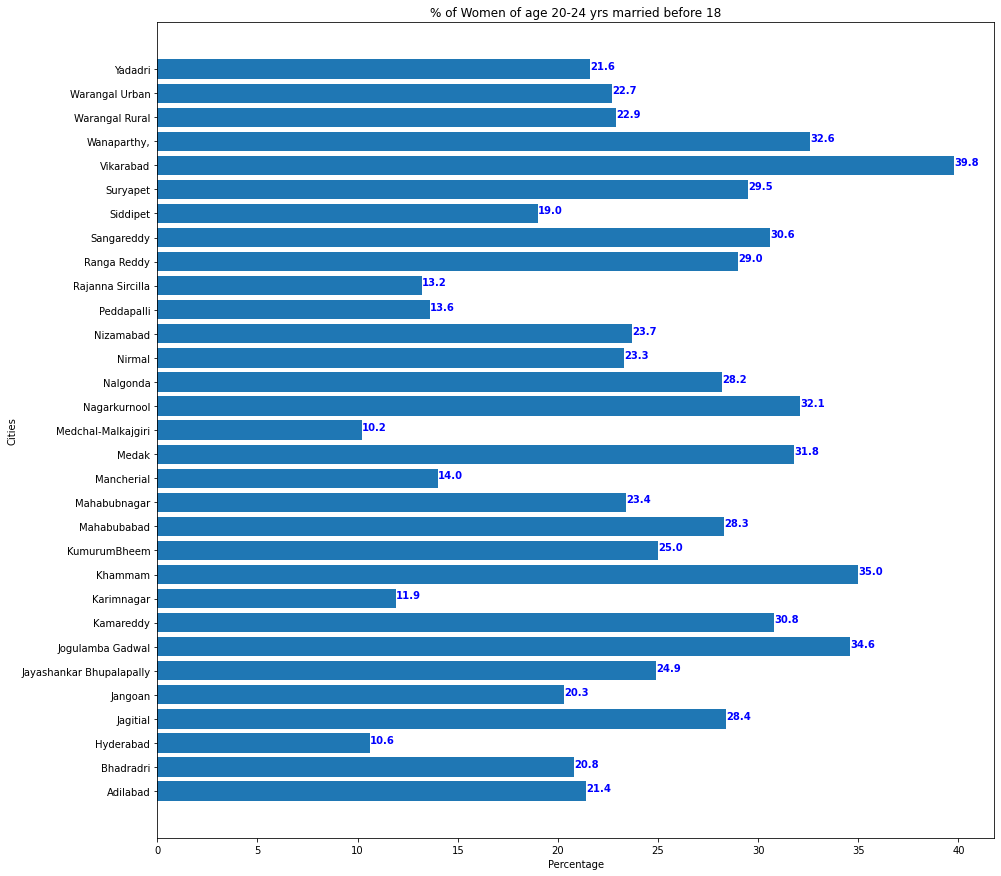

In [11]:
fig=plt.figure(figsize=(15,15))
plt.barh(districts,int_married_before18)
for i, v in enumerate(int_married_before18):
    plt.text(v, i, str(v), color = 'blue', fontweight = 'bold')
plt.xlabel("Percentage")
plt.ylabel("Cities")
plt.title("% of Women of age 20-24 yrs married before 18")
plt.show()

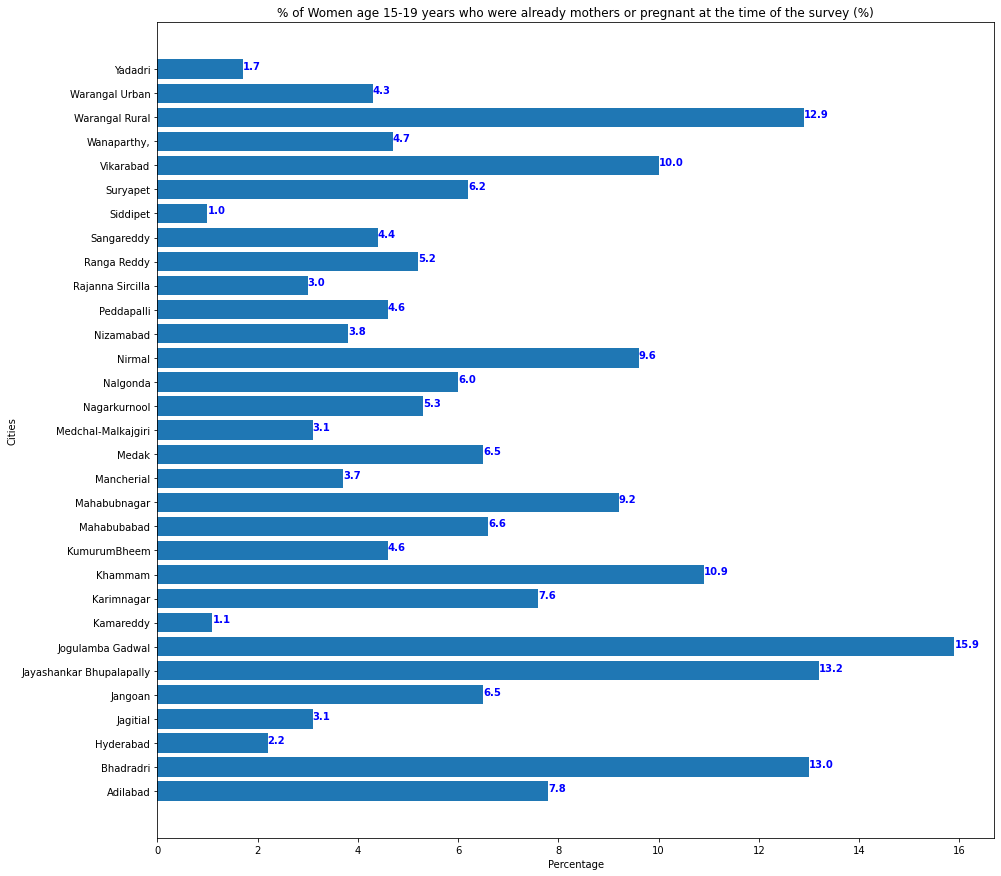

In [12]:
fig=plt.figure(figsize=(15,15))
plt.barh(districts,int_pregnant_mothers)
for i, v in enumerate(int_pregnant_mothers):
    plt.text(v, i, str(v), color = 'blue', fontweight = 'bold')
    
plt.xlabel("Percentage")
plt.ylabel("Cities")
plt.title("% of Women age 15-19 years who were already mothers or pregnant at the time of the survey (%)")
plt.show()

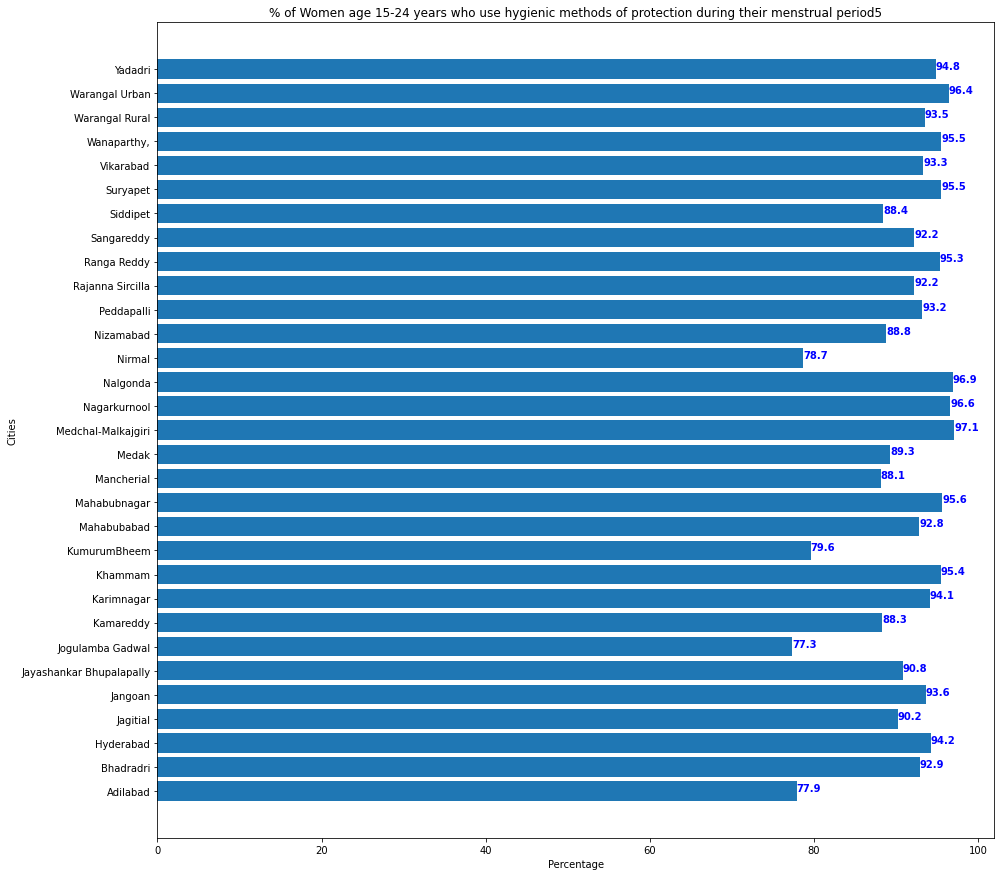

In [13]:
fig=plt.figure(figsize=(15,15))
plt.barh(districts,int_hyg_protection_mens)
for i, v in enumerate(int_hyg_protection_mens):
    plt.text(v, i, str(v), color = 'blue', fontweight = 'bold')
    
plt.xlabel("Percentage")
plt.ylabel("Cities")
plt.title("% of Women age 15-24 years who use hygienic methods of protection during their menstrual period5")
plt.show()

# **Current Use of Family Planning Methods (currently married women age 15–49 years)**

In [14]:
#Methods for family Planning
family_planning_dt=data[data["Category"]=="Current Use of Family Planning Methods (currently married women age 15–49 years)"]
family_planning_dt.head()

,Sl.No,Category,Indicators (2019-20),Urban,Rural,Total (2019-20),Total (2015-16),Adilabad,Bhadradri,Hyderabad,Jagitial,Jangoan,Jayashankar Bhupalapally,Jogulamba Gadwal,Kamareddy,Karimnagar,Khammam,KumurumBheem,Mahabubabad,Mahabubnagar,Mancherial,Medak,Medchal-Malkajgiri,Nagarkurnool,Nalgonda,Nirmal,Nizamabad,Peddapalli,Rajanna Sircilla,Ranga Reddy,Sangareddy,Siddipet,Suryapet,Vikarabad,"Wanaparthy,",Warangal Rural,Warangal Urban,Yadadri
19,20.0,Current Use of Family Planning Methods (curren...,20. Any method6 (%),69.0,67.6,68.1,57.2,54.3,75.0,71.8,57.4,71.0,64.8,75.5,56.8,56.8,78.7,49.4,75.4,72.0,55.3,57.4,76.4,77.3,78.5,59.3,60.3,66.1,60.7,72.6,62.3,59.8,78.2,69.8,77.3,60.0,67.7,76.2
20,21.0,Current Use of Family Planning Methods (curren...,21. Any modern method6 (%),66.9,66.5,66.7,57.0,54.1,74.0,70.0,56.5,70.4,64.3,74.9,56.8,56.4,76.2,49.1,74.7,70.1,55.3,55.7,72.4,76.5,77.2,58.5,56.8,64.8,59.3,69.7,61.7,59.4,77.9,69.8,75.7,57.5,64.4,75.0
21,22.0,Current Use of Family Planning Methods (curren...,22. Female sterilization (%),61.3,62.2,61.9,54.2,50.2,68.2,64.6,47.7,67.2,51.0,71.5,55.9,44.4,73.8,46.9,68.9,68.0,53.9,53.9,65.8,73.2,75.1,53.8,52.4,60.0,49.9,67.6,56.8,54.5,75.9,68.7,74.4,47.0,50.1,72.3
22,23.0,Current Use of Family Planning Methods (curren...,23. Male sterilization (%),1.4,2.3,2.0,1.6,0.6,2.2,0.0,6.3,1.4,11.3,0.0,0.1,10.9,0.4,0.3,4.6,0.0,0.5,0.3,0.8,0.0,0.0,0.3,0.0,3.3,5.9,0.1,0.3,0.9,0.4,0.0,0.0,8.7,11.2,0.2
23,24.0,Current Use of Family Planning Methods (curren...,24. IUD/PPIUD (%),1.0,0.2,0.5,0.4,0.0,0.3,1.8,0.8,0.3,0.0,0.5,0.3,0.1,0.2,0.1,0.0,0.3,0.2,0.0,0.9,0.8,0.4,0.6,0.0,0.1,0.0,0.3,0.6,0.7,0.0,0.3,0.2,0.0,0.4,0.3


In [58]:
indic=family_planning_dt["Indicators (2019-20)"]
indicators=[]

for i in indic:
  indicators.append(i[3:-4])

int_urban=[]
int_rural=[]

for i in family_planning_dt["Urban"]:
  int_urban.append(float(i))

for j in family_planning_dt["Rural"]:
  int_rural.append(float(j))

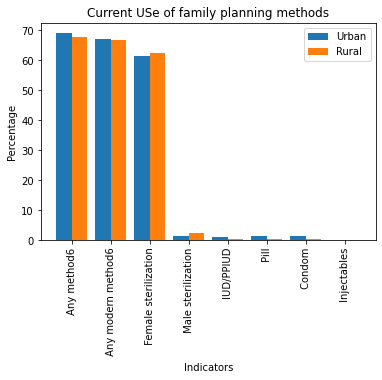

In [59]:
x_axis = np.arange(len(indicators))
plt.bar(x_axis - 0.2,int_urban, 0.4, label = 'Urban')
plt.bar(x_axis + 0.2,int_rural, 0.4, label = 'Rural')

plt.xticks(x_axis, indicators,rotation=90)
plt.xlabel("Indicators")
plt.ylabel("Percentage")
plt.title("Current USe of family planning methods")
plt.legend()
plt.show()

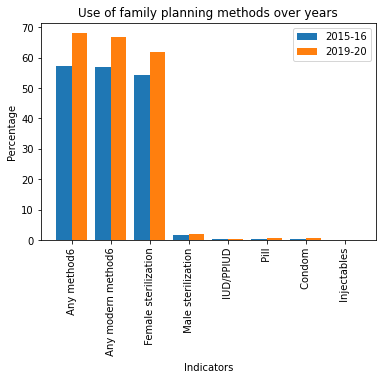

In [60]:
int_past=[]
int_now=[]

for i in family_planning_dt["Total (2015-16)"]:
  int_past.append(float(i))

for j in family_planning_dt["Total (2019-20)"]:
  int_now.append(float(j))

x_axis = np.arange(len(indicators))

plt.bar(x_axis - 0.2,int_past, 0.4, label = '2015-16')
plt.bar(x_axis + 0.2,int_now, 0.4, label = '2019-20')

plt.xticks(x_axis, indicators,rotation=90)
plt.xlabel("Indicators")
plt.ylabel("Percentage")
plt.title("Use of family planning methods over years")
plt.legend()
plt.show()

In [89]:
any_methods=family_planning_dt[family_planning_dt["Indicators (2019-20)"]=="20. Any method6 (%)"]
any_methods_districtwise=any_methods.iloc[:,7:].values
int_any_methods=[]
for i in range(len(districts)):
  int_any_methods.append(float(any_methods_districtwise[0][i]))


modern_methods=family_planning_dt[family_planning_dt["Indicators (2019-20)"]=="21. Any modern method6 (%)"]
modern_methods_districtwise=modern_methods.iloc[:,7:].values
int_modern_methods=[]
for i in range(len(districts)):
  int_modern_methods.append(float(modern_methods_districtwise[0][i]))

fem_ster=family_planning_dt[family_planning_dt["Indicators (2019-20)"]=="22. Female sterilization (%)"]
fem_ster_districtwise=fem_ster.iloc[:,7:].values
int_fem_ster=[]
for i in range(len(districts)):
  int_fem_ster.append(float(fem_ster_districtwise[0][i]))


male_ster=family_planning_dt[family_planning_dt["Indicators (2019-20)"]=="23. Male sterilization (%)"]
male_ster_districtwise=male_ster.iloc[:,7:].values
int_male_ster=[]
for i in range(len(districts)):
  int_male_ster.append(float(male_ster_districtwise[0][i]))


iud=family_planning_dt[family_planning_dt["Indicators (2019-20)"]=="24. IUD/PPIUD (%)"]
iud_districtwise=iud.iloc[:,7:].values
int_iud=[]
for i in range(len(districts)):
  int_iud.append(float(iud_districtwise[0][i]))


pills=family_planning_dt[family_planning_dt["Indicators (2019-20)"]=="25. Pill (%)"]
pills_districtwise=modern_methods.iloc[:,7:].values
int_pills=[]
for i in range(len(districts)):
  int_pills.append(float(pills_districtwise[0][i]))

condom=family_planning_dt[family_planning_dt["Indicators (2019-20)"]=="26. Condom (%)"]
condom_districtwise=modern_methods.iloc[:,7:].values
int_condom=[]
for i in range(len(districts)):
  int_condom.append(float(condom_districtwise[0][i]))

inject=family_planning_dt[family_planning_dt["Indicators (2019-20)"]=="27. Injectables (%)"]
inject_districtwise=inject.iloc[:,7:].values
int_inject=[]
for i in range(len(districts)):
  int_inject.append(float(inject_districtwise[0][i]))

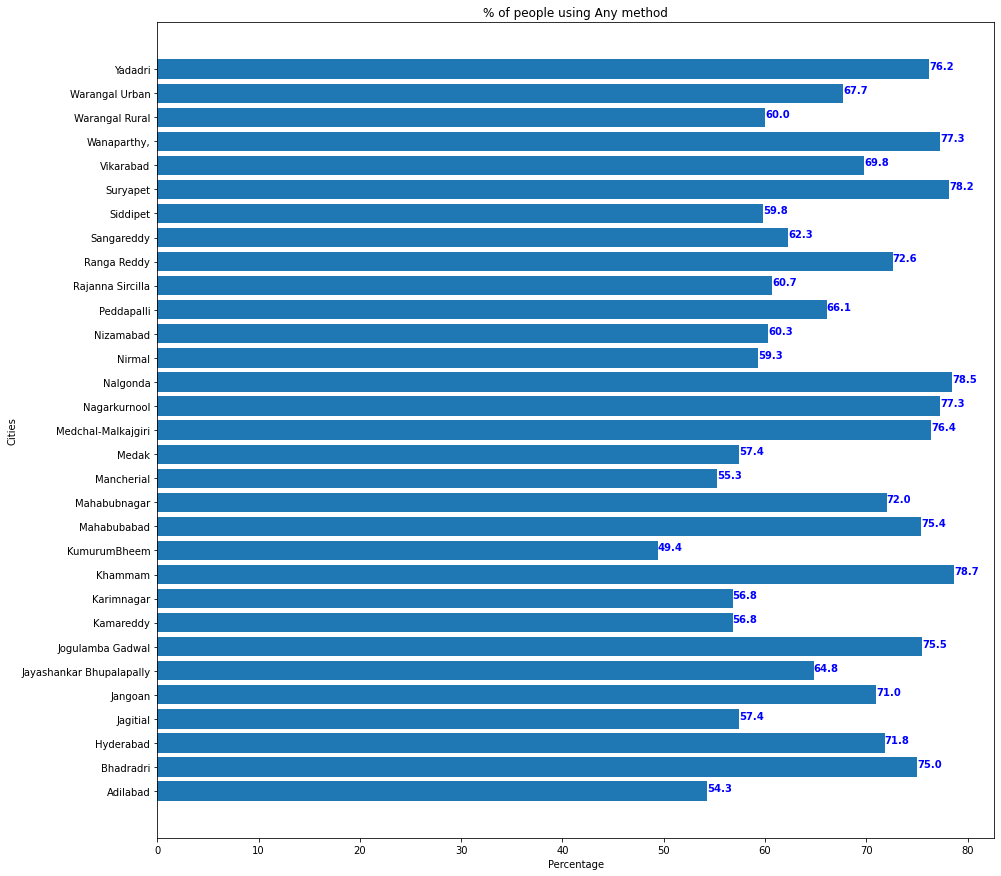

In [90]:
fig=plt.figure(figsize=(15,15))
plt.barh(districts,int_any_methods)
for i, v in enumerate(int_any_methods):
    plt.text(v, i, str(v), color = 'blue', fontweight = 'bold')
    
plt.xlabel("Percentage")
plt.ylabel("Cities")
plt.title("% of people using Any method")
plt.show()

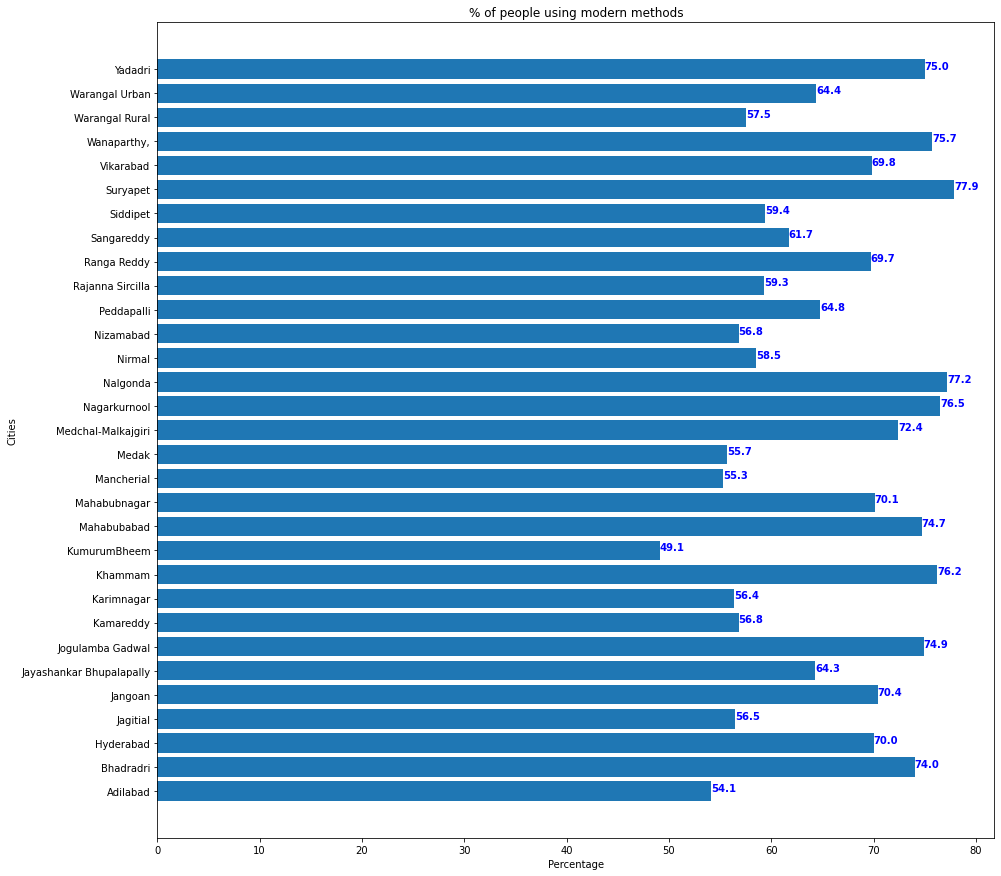

In [91]:
fig=plt.figure(figsize=(15,15))
plt.barh(districts,int_modern_methods)
for i, v in enumerate(int_modern_methods):
    plt.text(v, i, str(v), color = 'blue', fontweight = 'bold')
    
plt.xlabel("Percentage")
plt.ylabel("Cities")
plt.title("% of people using modern methods")
plt.show()

In [92]:
fig=plt.figure(figsize=(15,15))
plt.barh(districts,int_fem_ster
for i, v in enumerate(int_fem_ster):
    plt.text(v, i, str(v), color = 'blue', fontweight = 'bold')
    
plt.xlabel("Percentage")
plt.ylabel("Cities")
plt.title("% of people using female sterlisation")
plt.show()

SyntaxError: ignored

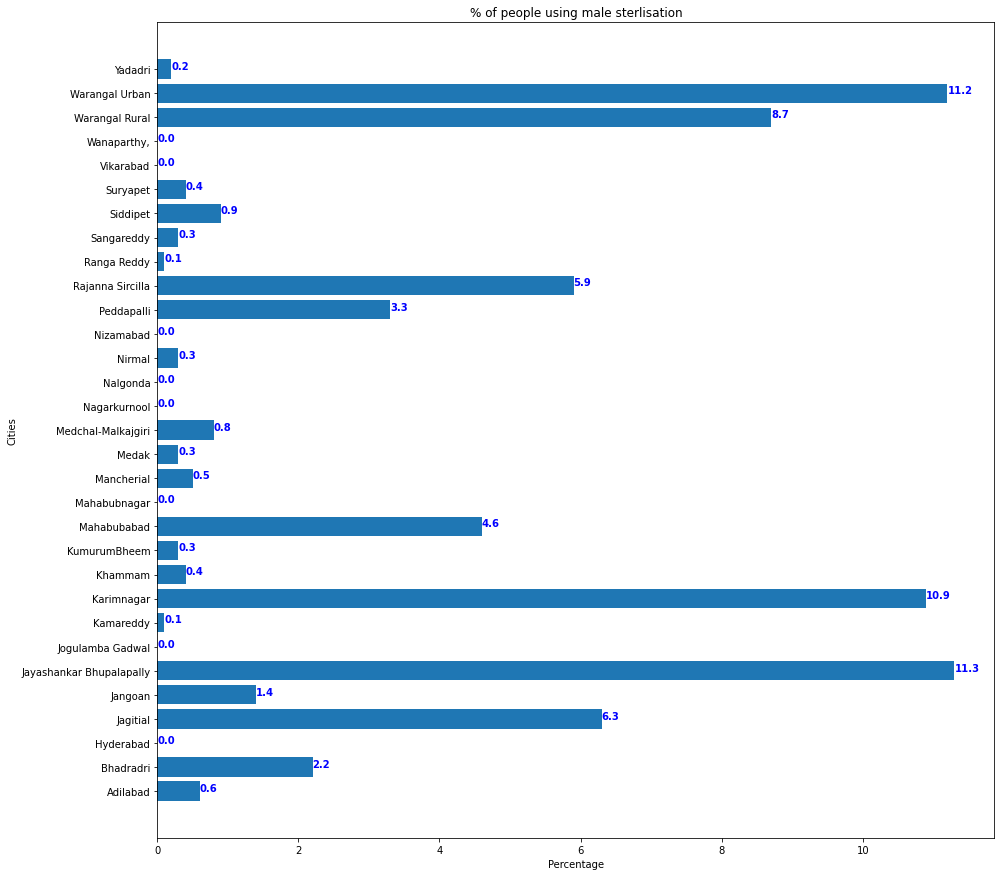

In [93]:
fig=plt.figure(figsize=(15,15))
plt.barh(districts,int_male_ster)
for i, v in enumerate(int_male_ster):
    plt.text(v, i, str(v), color = 'blue', fontweight = 'bold')
    
plt.xlabel("Percentage")
plt.ylabel("Cities")
plt.title("% of people using male sterlisation")
plt.show()

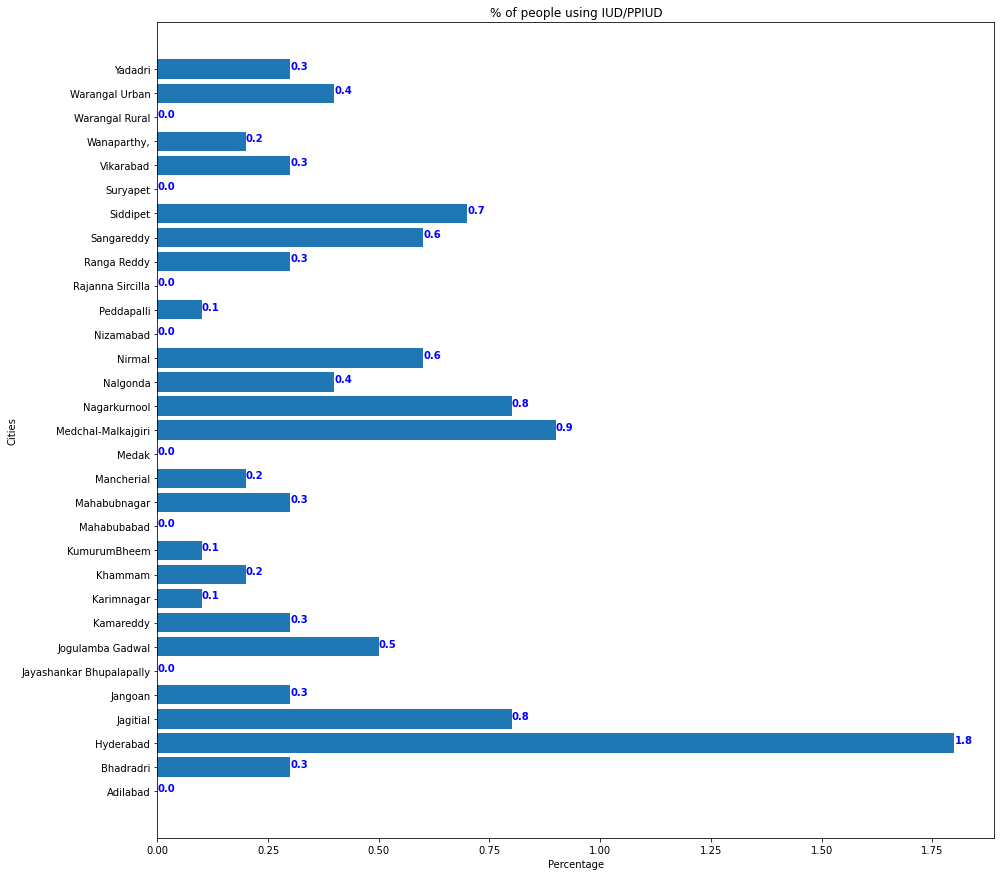

In [94]:
fig=plt.figure(figsize=(15,15))
plt.barh(districts,int_iud)
for i, v in enumerate(int_iud):
    plt.text(v, i, str(v), color = 'blue', fontweight = 'bold')
    
plt.xlabel("Percentage")
plt.ylabel("Cities")
plt.title("% of people using IUD/PPIUD")
plt.show()

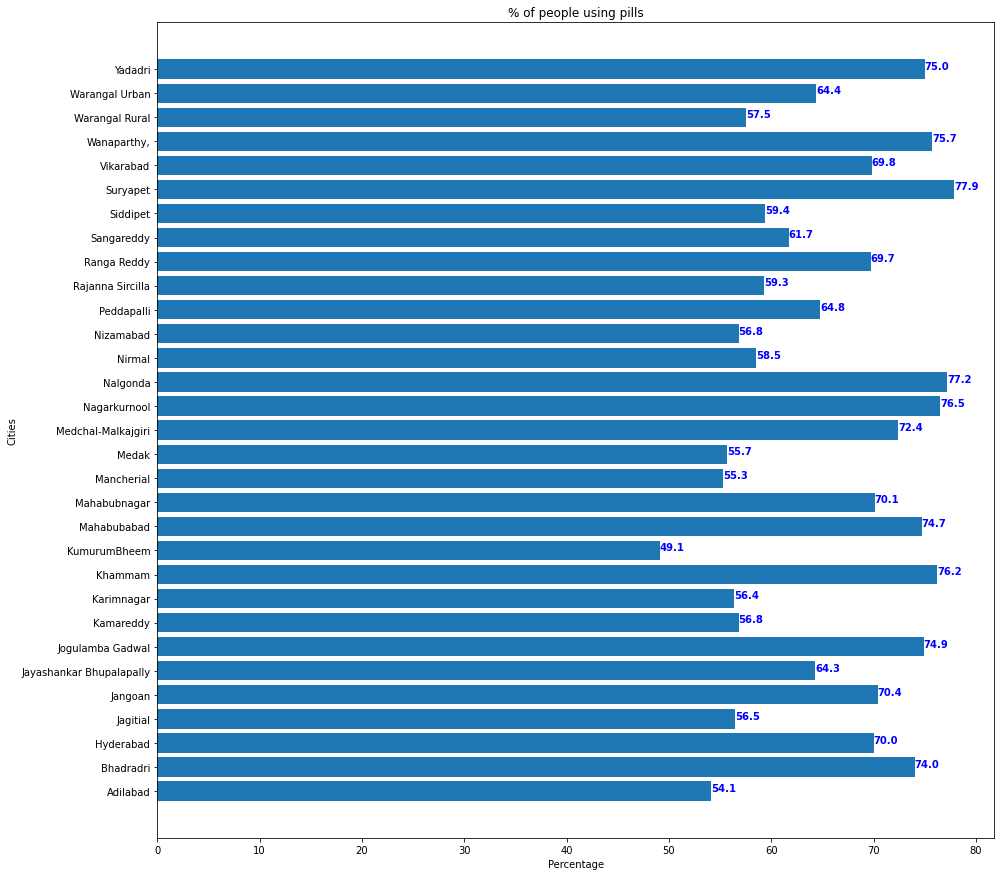

In [95]:
fig=plt.figure(figsize=(15,15))
plt.barh(districts,int_pills)
for i, v in enumerate(int_pills):
    plt.text(v, i, str(v), color = 'blue', fontweight = 'bold')
    
plt.xlabel("Percentage")
plt.ylabel("Cities")
plt.title("% of people using pills")
plt.show()

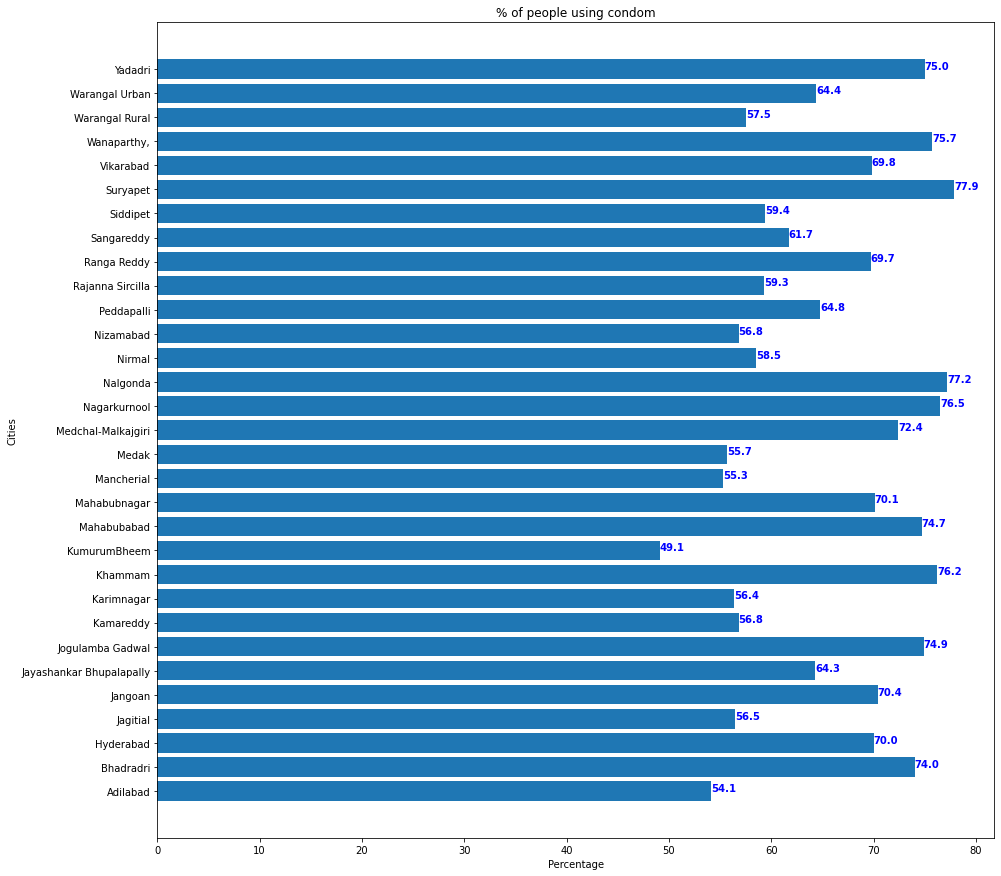

In [96]:
fig=plt.figure(figsize=(15,15))
plt.barh(districts,int_condom)
for i, v in enumerate(int_condom):
    plt.text(v, i, str(v), color = 'blue', fontweight = 'bold')
    
plt.xlabel("Percentage")
plt.ylabel("Cities")
plt.title("% of people using condom")
plt.show()

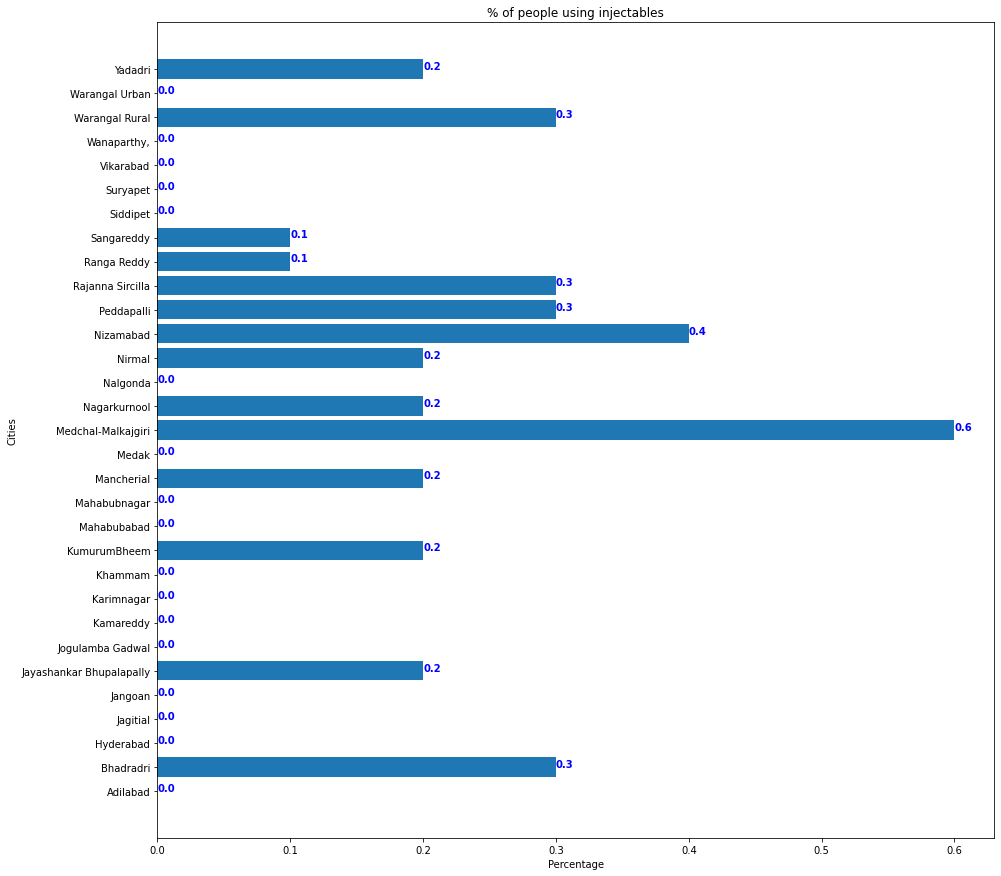

In [97]:
fig=plt.figure(figsize=(15,15))
plt.barh(districts,int_inject)
for i, v in enumerate(int_inject):
    plt.text(v, i, str(v), color = 'blue', fontweight = 'bold')
    
plt.xlabel("Percentage")
plt.ylabel("Cities")
plt.title("% of people using injectables")
plt.show()

# **Quality of Family Planning Services**

In [63]:
family_planning_services_dt=data[data["Category"]=="Quality of Family Planning Services"]
family_planning_services_dt.head()

,Sl.No,Category,Indicators (2019-20),Urban,Rural,Total (2019-20),Total (2015-16),Adilabad,Bhadradri,Hyderabad,Jagitial,Jangoan,Jayashankar Bhupalapally,Jogulamba Gadwal,Kamareddy,Karimnagar,Khammam,KumurumBheem,Mahabubabad,Mahabubnagar,Mancherial,Medak,Medchal-Malkajgiri,Nagarkurnool,Nalgonda,Nirmal,Nizamabad,Peddapalli,Rajanna Sircilla,Ranga Reddy,Sangareddy,Siddipet,Suryapet,Vikarabad,"Wanaparthy,",Warangal Rural,Warangal Urban,Yadadri
29,30.0,Quality of Family Planning Services,30. Health worker ever talked to female non-us...,17.2,16.9,17.0,9.6,12.0,18.3,18.5,17.3,19.5,13.5,24.7,9.4,14.5,25.8,12.5,16.3,31.4,9.5,9.1,25.4,27.1,23.6,9.2,8.6,16.9,18.9,18.7,10.2,11.6,16.6,8.6,22.3,16.3,27.8,20.6
30,31.0,Quality of Family Planning Services,31. Current users ever told about side effects...,52.4,47.2,49.2,25.1,32.6,51.3,58.2,24.0,33.9,47.1,43.3,44.4,24.3,54.9,33.0,59.5,48.3,33.0,51.4,57.9,58.3,62.8,39.4,60.4,44.5,60.0,53.4,47.5,46.7,36.9,36.5,36.6,53.5,49.4,58.5


In [64]:
indic=family_planning_services_dt["Indicators (2019-20)"]
indicators=[]

for i in indic:
  indicators.append(i[3:-4])

int_urban=[]
int_rural=[]

for i in family_planning_services_dt["Urban"]:
  int_urban.append(float(i))

for j in family_planning_services_dt["Rural"]:
  int_rural.append(float(j))

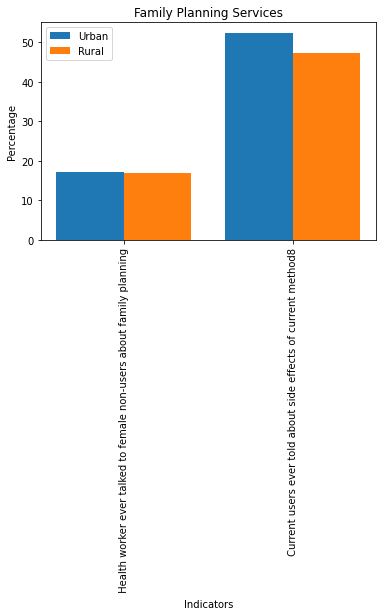

In [65]:
x_axis = np.arange(len(indicators))
plt.bar(x_axis - 0.2,int_urban, 0.4, label = 'Urban')
plt.bar(x_axis + 0.2,int_rural, 0.4, label = 'Rural')

plt.xticks(x_axis, indicators,rotation=90)
plt.xlabel("Indicators")
plt.ylabel("Percentage")
plt.title("Family Planning Services")
plt.legend()
plt.show()

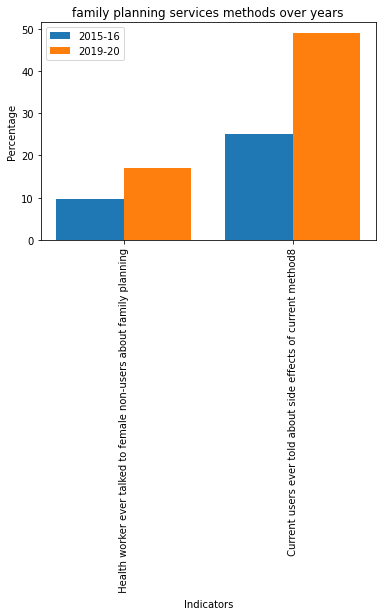

In [76]:
int_past=[]
int_now=[]

for i in family_planning_services_dt["Total (2015-16)"]:
  int_past.append(float(i))

for j in family_planning_services_dt["Total (2019-20)"]:
  int_now.append(float(j))

x_axis = np.arange(len(indicators))

plt.bar(x_axis - 0.2,int_past, 0.4, label = '2015-16')
# for i, v in enumerate(int_past):
#     plt.text(v, i, str(v))

plt.bar(x_axis + 0.2,int_now, 0.4, label = '2019-20')
# for i, v in enumerate(int_now):
#     plt.text(v, i, str(v))

plt.xticks(x_axis, indicators,rotation=90)
plt.xlabel("Indicators")
plt.ylabel("Percentage")
plt.title("family planning services methods over years")
plt.legend()
plt.show()

In [82]:
female_non_users=family_planning_services_dt[family_planning_services_dt["Indicators (2019-20)"]=="30. Health worker ever talked to female non-users about family planning (%)"]
female_non_users_districtwise=female_non_users.iloc[:,7:].values
int_female_non_users=[]
for i in range(len(districts)):
  int_female_non_users.append(float(female_non_users_districtwise[0][i]))

In [83]:
side_effects=family_planning_services_dt[family_planning_services_dt["Indicators (2019-20)"]=="31. Current users ever told about side effects of current method8 (%)"]
side_effects_districtwise=side_effects.iloc[:,7:].values
int_side_effects=[]
for i in range(len(districts)):
  int_side_effects.append(float(side_effects_districtwise[0][i]))

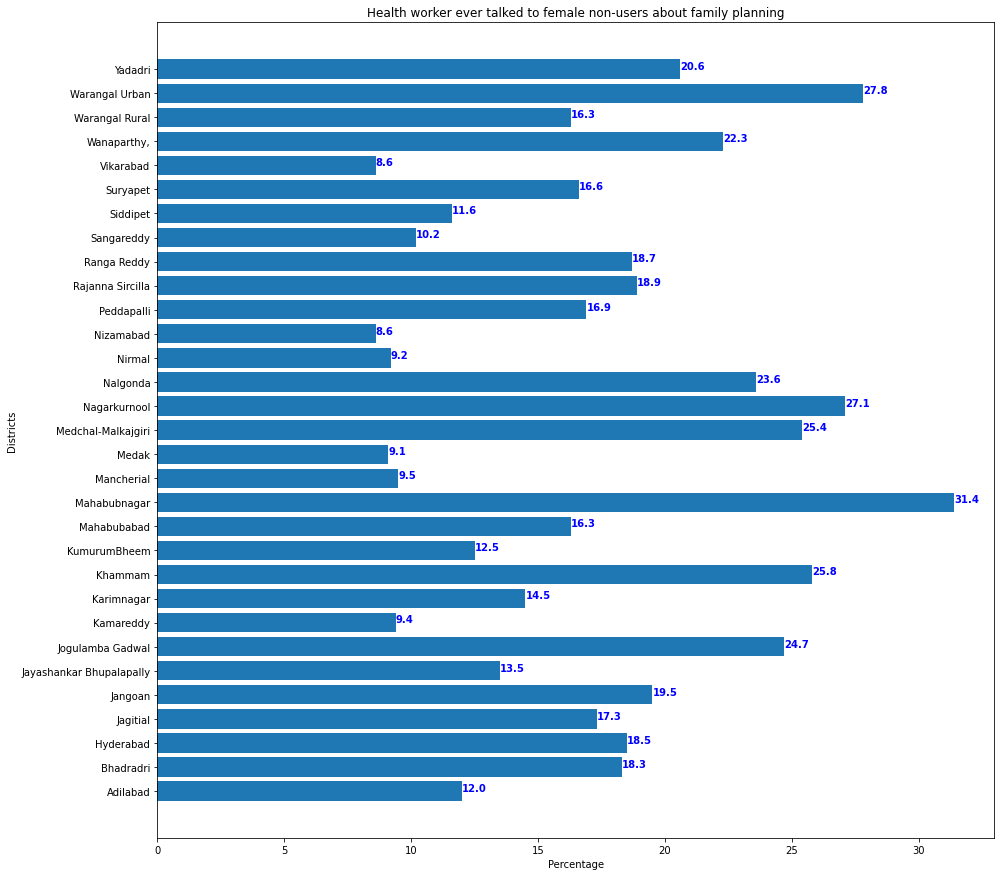

In [84]:
fig=plt.figure(figsize=(15,15))
plt.barh(districts,int_female_non_users)
for i, v in enumerate(int_female_non_users):
    plt.text(v, i, str(v), color = 'blue', fontweight = 'bold')
plt.xlabel("Percentage")
plt.ylabel("Districts")
plt.title("Health worker ever talked to female non-users about family planning")
plt.show()

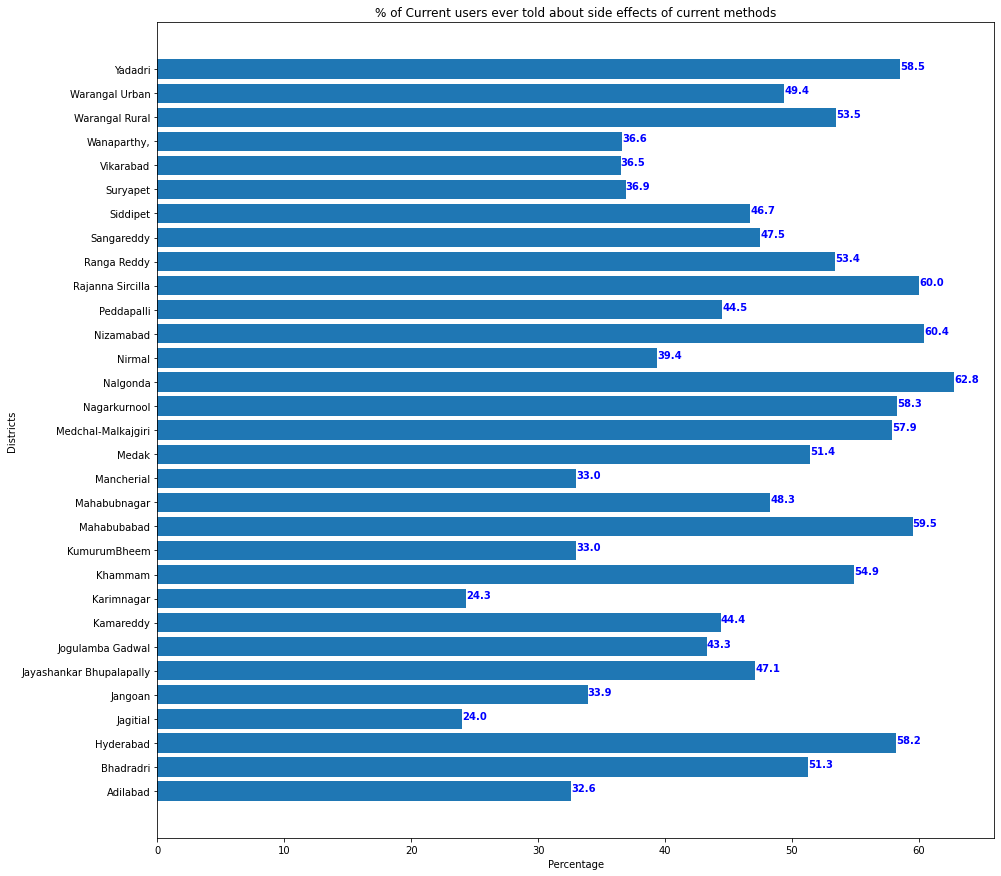

In [85]:
fig=plt.figure(figsize=(15,15))
plt.barh(districts,int_side_effects)
for i, v in enumerate(int_side_effects):
    plt.text(v, i, str(v), color = 'blue', fontweight = 'bold')
plt.xlabel("Percentage")
plt.ylabel("Districts")
plt.title("% of Current users ever told about side effects of current methods")
plt.show()